In [2]:
%matplotlib inline

In [6]:
from scipy.misc import imread
import matplotlib.pyplot as plt

In [3]:
im = imread('Anthopleura_MEX13@/image0010.tif')

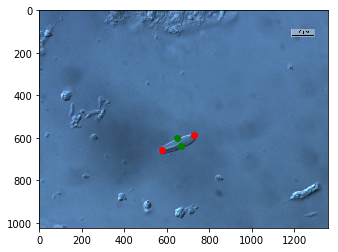

In [30]:
ax = plt.imshow(im)
#plt.scatter(100,100, c='red')
#plt.scatter(x*9.2142813205739939e-08*1000000, y*9.2142813205739939e-08*1000000)

for x,y in points[:2]:
    plt.scatter(x*9.2142813205739939e-08*10000+680, y*9.2142813205739939e-08*10000+512, c='red')
    
for x,y in points[3:5]:
    plt.scatter(x*9.2142813205739939e-08*10000+680, y*9.2142813205739939e-08*10000+512, c='green')

In [16]:
x = 107738.198899376
y = -239517.653950472

x*9.2142813205739939e-08*1000000

9927.30073630806

In [ ]:
math.sqrt((51449 + 113768)**2 + (78666 - 156927)**2)

In [20]:
points = [
    (51449, 78666), (-113768, 156927), (-130000, -39000), (-16666, 139536), (-34058, 96057), (-130000, -39000)
]

for x,y in points:
    print(x*9.2142813205739939e-08*100000, y*9.2142813205739939e-08*100000)

474.06555966221146 724.8506543642737
-1048.2903572790622 1445.9695247937152
-1197.856571674619 -359.35697150238576
-153.5652124886862 1285.7239583476128
-313.8199932161091 885.0962208103762
-1197.856571674619 -359.35697150238576


In [23]:
1360*9.2142813205739939e-08*1000000

125.31422595980632

In [24]:
9.2142813205739939e-08*1000000

0.09214281320573994

In [25]:
#571, 666
#732, 591

-34058 + 16666

-17392

In [60]:
from pathlib import Path
for p in Path('Anthopleura_MEX13@').glob('*.tif'):
    print(p)

Anthopleura_MEX13@\image0010.tif
Anthopleura_MEX13@\image0013.tif
Anthopleura_MEX13@\image0019.tif
Anthopleura_MEX13@\image0025.tif
Anthopleura_MEX13@\image0032.tif
Anthopleura_MEX13@\image0041.tif
Anthopleura_MEX13@\image0065.tif
Anthopleura_MEX13@\image0070.tif
Anthopleura_MEX13@\image0073.tif
Anthopleura_MEX13@\image0074.tif
Anthopleura_MEX13@\image0076.tif
Anthopleura_MEX13@\image0083.tif
Anthopleura_MEX13@\image0095.tif
Anthopleura_MEX13@\image0100.tif


In [31]:
import xml.etree.ElementTree as ET
tree = ET.parse('Anthopleura_MEX13@/image0010.tif.lmd')

In [101]:
import re

with open('acontia/image0004.tif.anx', 'r') as f:
    #print(f.read())
    print(float(re.match(r'.*<MetresPerPixel>(.*)</MetresPerPixel>.*', f.read(), flags=re.DOTALL).groups()[0]))

9.214281354631696e-08


Anthopleura_MEX13@\image0010.tif


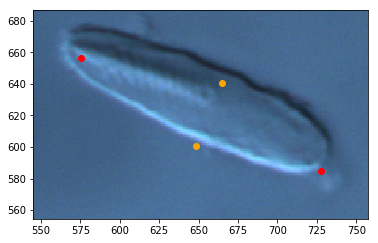

Anthopleura_MEX13@\image0013.tif


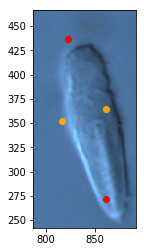

Anthopleura_MEX13@\image0019.tif


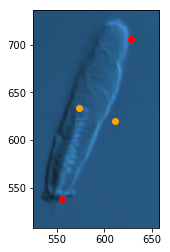

Anthopleura_MEX13@\image0025.tif


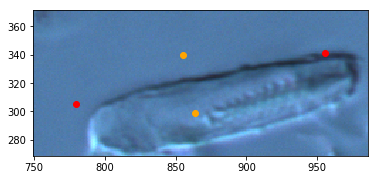

Anthopleura_MEX13@\image0032.tif


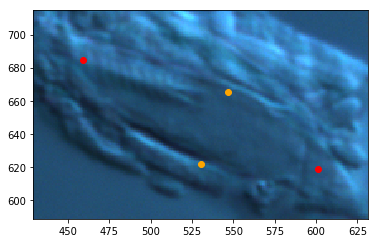

Anthopleura_MEX13@\image0041.tif


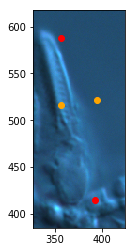

Anthopleura_MEX13@\image0065.tif


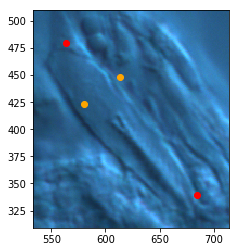

Anthopleura_MEX13@\image0070.tif


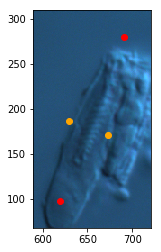

Anthopleura_MEX13@\image0073.tif


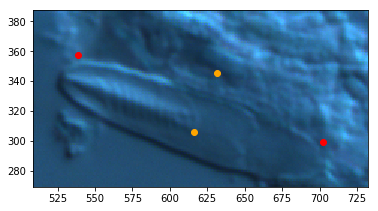

Anthopleura_MEX13@\image0074.tif


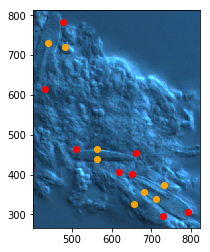

Anthopleura_MEX13@\image0076.tif


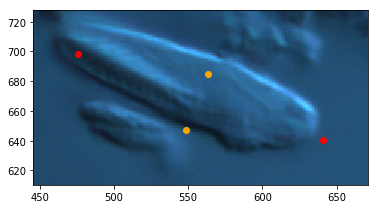

Anthopleura_MEX13@\image0083.tif


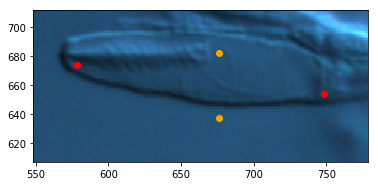

Anthopleura_MEX13@\image0095.tif


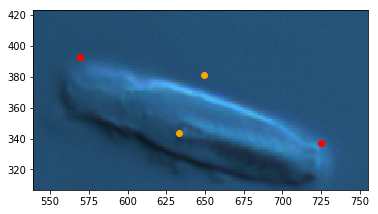

Anthopleura_MEX13@\image0100.tif


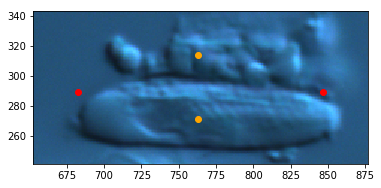

In [107]:
#metersPerPixel = 9.2142813205739939e-08
#9.2142813546316958E-08
#metersPerPixel = 9.2e-08

def convertX(p, metersPerPixel):
    return p*metersPerPixel*10000+680

def convertY(p, metersPerPixel):
    return p*metersPerPixel*10000+512

from pathlib import Path
for p in Path('Anthopleura_MEX13@').glob('*.tif'):
    print(p)
    with open(str(p) + '.anx', 'r') as f:
        metersPerPixel = float(re.match(r'.*<MetresPerPixel>(.*)</MetresPerPixel>.*', f.read(), flags=re.DOTALL).groups()[0])
        #print(metersPerPixel)

    import xml.etree.ElementTree as ET
    tree = ET.parse(str(p) + '.lmd')

    def getCoordsFromPoint(el):
        #coords = []
        x = None
        y = None
        for e in el:
            #print(e, e.text)
            if e.tag == "PointIndex" and e.text == '2':
                return None
            if e.tag == "PositionX":
                x = e.text
            if e.tag == "PositionY":
                y = e.text

        return [x,y]

    points = []
    for c in tree.getroot():
        for c2 in c:
            #print(c2.tag)
            if c2.tag == "LMMeasurementItemPoints":
                coords = getCoordsFromPoint(c2)
                if coords:
                    points.append([float(i) for i in coords])



    im = imread(str(p))
    ax = plt.imshow(im)
    
    for i in range(0,len(points), 4):

        for x,y in points[i+0:i+2]:
            plt.scatter(convertX(x, metersPerPixel), convertY(y, metersPerPixel), c='red')

        for x,y in points[i+2:i+4]:
            plt.scatter(convertX(x, metersPerPixel), convertY(y, metersPerPixel), c='orange')
            
    buffer = 30
        
    x_extent = convertX(np.array(points)[:,0].min(), metersPerPixel)-buffer, convertX(np.array(points)[:,0].max(), metersPerPixel)+buffer
    ax.axes.set_xlim(x_extent)
    
    y_extent = convertY(np.array(points)[:,1].min(), metersPerPixel)-buffer, convertY(np.array(points)[:,1].max(), metersPerPixel)+buffer
    ax.axes.set_ylim(y_extent)
        
    
        
    plt.show()

In [71]:
import numpy as np
x_extent = np.array(points)[:,0].min(), np.array(points)[:,0].max()